# Домашнее задание 4

__Дедлайн: 14.12.2021, 23:59__

Файлы должны иметь имя HW4_ФАМИЛИЯ.ipynb, где ФАМИЛИЯ - Ваша фамилия русскими буквами. 

Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться **без ошибок**. 

Во всех задачах, где требуется сравнить методы, требуется аккуратное офрмление графиков, если Вы их будете строить, и комментарии к графикам (кто кого быстрее и когда сходится, какие интересные моменты Вы видите на графиках, как Вы их можете объяснить). Аналогично, требуются комментарии в случае, если Вы сравниваете время работы.

Задачи со звездочкой не являются обязательными к решению, но за них будут даны бонусные баллы.

Суммарное количество баллов: 11

## Задача 1. Group Lasso [11]

Рассмотрим задачу линейной регрессии. Пусть есть некоторая матрица признаков $X$ и целевая переменная $\mathbf{y}$. Целью задачи является найти вектор $w$, такой что $\mathbf{y}\approx X\mathbf{w}$. Такой вектор ищется за счет минимизации невязки $Xw-y$, т.е. решения задачи оптимизации:

$$\frac{1}{2n}\|X\mathbf{w}-\mathbf{y}\|^2\rightarrow \min_{\mathbf{w}\in\mathbb{R}^m}. \qquad\qquad (1)$$

К сожалению, данная проблема зачастую плохо определена. Для того, чтобы сделать задачу хорошо определенной или получить решение с некоторыми свойствами, предлагается решать регуляризованную задачу.

$$\frac{1}{2n}\|X\mathbf{w}-\mathbf{y}\|^2 + \sigma R(\mathbf{w})\rightarrow \min_{\mathbf{w}\in\mathbb{R}^m}. \qquad\qquad (2)$$

На семинарах мы упоминали $\ell_2$-регуляризацию $R(w)=\|\mathbf{\mathbf{w}}\|_2^2$, которая дает малость компонент вектора $w$. На семинаре про проксимальные методы мы работали с $\ell_1$ регуляризатором $R(\mathbf{w})=\|\mathbf{w}\|_1$ (LASSO), который дает разреженность компонент вектора $w$. В данном упражнении мы будем работать с еще одним регуляризатором.

В случае, если $m$ признаков $(w_1\dots w_m)$ можно разбить на $K$ некоторых подгрупп вида $(w_1\dots w_{i_1}),\dots (w_{K-1} \dots w_{i_{K}})$ и сопоставить каждой из групп вектор вида $\mathbf{w}_1 \dots \mathbf{w}_K$ соответсвующей размерности, то можно сформулировать так называемую задачу Group LASSO:

$$\frac{1}{2n}\left\|\sum\limits_{i=1}^K X_i \mathbf{w}_i-\mathbf{y}\right\|^2 + \sigma \sum\limits_{i=1}^K \|\mathbf{w}_i\|_2\rightarrow \min_{\mathbf{w}_i \in\mathbb{R}^l, i=\overline{1,K}}, \qquad\qquad (3)$$
где $X_i$ - это соответствующие подматрицы матрицы $X$. Заметим, что эта постановка является некоторым упрощением, поскольку мы предположили, что все группы имеют размер $l$.

В этом задании можно считать известным выражение для субдиффернциала $\|\cdot\|_2$ (выведено на семинаре) и для проксимального оператора функции $\|\cdot\|$.

$$\text{prox}_{\alpha, \|\cdot\|}(u) = \left(1-\frac{\alpha}{\|\mathbf{u}\|_2}\right)_+ \mathbf{u},$$
где $(a)_+=\max(0, a)$.

1. [1] Реализуйте вычисление субградиента `subgradF`.

2. [1] Настройте субградиентный метод с постоянным шагом

3. [1] Настройте субградиентный метод с убывающим шагом. Рассмотрите стратегии вида $\frac{\beta}{(k+\gamma)^p}$, а также $\min\left(\alpha, \frac{\alpha}{k+1}\right),$ т.е. убывающую с некоторого момента

4. [2] Сравните по времени субградиентные методы из пунктов 2 и 3 и выберите лучший.

5. [2] Найдите выражение для проксимального оператора $\text{prox}_{\alpha, R(\mathbf{w})}$ для $R(\mathbf{w})=\sigma \sum\limits_{i=1}^K \|\mathbf{w}_i\|_2$. Реализуйте его в классе `R_prox`

6. [2] Сравните по времени и по итерациям

    - Субградиентный метод с 4 пункта
    
    - Проксимальный метод с Backtracking Search

    - Ускоренный Проксимальный метод с Backtracking Search
    
   Для сходимости рисуйте графики $f_k-f^*$, где $f^*$ есть минимальное достигнутое значение всеми методами минус некоторая малая константа (напр., $10^{-9}$).
    
7. [2] Для каждого из решений, полученных на предыдущем пункте, выведите количество нулевых весов в кажой группе. Сделайте выводы.

Матрицу признаков разбитых на группы возьмите из файла `data/X.npy`, вектор целевых значений из файла `data/y.npy`. Матрица $X$ имеет размерность $(n,K,l)$, соответсвенно, $n$ объектов с $Kl$ признаков разбитых на $K$ групп.

В качестве стартовой точки возьмите нулевой вектор. Параметр регуляризации $\sigma=1$.

### Решение задачи 1: 

In [1]:
import numpy as np
import time
import requests
import matplotlib.pyplot as plt

In [2]:
class GroupLasso:
    """
    Class for Group Lasso Problem
    """

    def __init__(self, X, y, sigma=0.):
        """
        :param X: np.array[n, K, l], features
        :param y: np.array[n,], target vector
        :param sigma: float, parameter of regularization
        """
        self.X = X
        self.y = y
        self.n, self.K, self.l = X.shape
        self.sigma = sigma

    def F(self, w):
        """
        Calculate function
        F(w)= 1/2n ||Xw-y||^2 + sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, f(A)
        """
        return self.f(w) + self.R(w)

    def subgradF(self, w):
        """
        Calculate subgradient of function
        F(w)= 1/2n ||Xw-y||^2 + sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, F'(w)
        """
        w_ = w + ((np.linalg.norm(w, axis=1) == 0) * np.sqrt(1 / self.l)).reshape(-1, 1)
        w_ = w_ / np.linalg.norm(w_, axis=1).reshape(-1, 1)        
        return self.gradf(w) + self.sigma * w_

    def calc_Xw(self, w):
        X, y = self.X, self.y
        return np.dot(X.reshape(self.n, -1), w.reshape(-1))

    def f(self, w):
        """
        Calculate function
        f(A)= 1/2n ||Xw-y||^2

        :param w: np.array[K, l], parameters
        :return: float, f(w)
        """
        r = self.calc_Xw(w) - self.y
        ret = 1 / (2 * self.n) * (r ** 2).sum()
        return ret

    def gradf(self, w):
        """
        Calculate gradient of function f

        :param w: np.array[K, l], parameters
        :return: np.array[K, l], gradient with respect to w
        """
        
        r = self.calc_Xw(w) - y
        gr = np.dot(X.T, r).T
        return gr * (1 / self.n)

    def R(self, w):
        """
        Calculate function
        R(w)=  sigma sum_{i=1}^k ||w_i||

        :param w: np.array[K, l], parameters
        :return: float, R(w)
        """
        return np.linalg.norm(w, axis=1).sum() * self.sigma

    def R_prox(self, w, alpha):
        """
        Calculate prox-operator of R at point w

        :param w: np.array[K, l], parameters
        :param alpha: float, parameter for prox trial
        :return: np.array[K, l], result of prox-operator
        """
        w_ = w + (( np.linalg.norm(w, axis=1) == 0) * np.sqrt(1 / self.l)).reshape(-1, 1)
        coefs = 1 - alpha / np.linalg.norm(self.sigma * w_, axis=1)
        coefs_ = coefs * (coefs > 0)
        return self.sigma * w * coefs_.reshape(-1, 1)

In [3]:
X = np.load("X.npy")
y = np.load("y.npy")
X.shape, y.shape

((200, 5, 20), (200,))

In [4]:
sigma = 1
n, k, l = X.shape
problem = GroupLasso(X, y, sigma)
x0 = np.zeros((k, l))

In [5]:
class GradientDescent:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []
    
    def solve(self, x0, f, gradf, tol=1e-3, max_iter=10000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        while x_prev is None or np.linalg.norm(x-x_prev) > tol: 
            h = -gradf(x)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            if self.return_history:
                self.history.append((x, time.time()))
            if k >= max_iter:
                break
            k += 1
        return x
    
class ProxGM:
    def __init__(self, fix_lam=None, lam0=1, beta=0.5, return_history=True, name=None):
        self.name = name
        self.return_history = return_history
        self.history = []
        self.lam0 = lam0
        self.fix_lam = fix_lam
        self.beta = beta
    
    def backtracking(self, x, f, gradf, g_prox):
        lam = self.lam0
        f_x = f(x)
        f_grad_x = gradf(x)
        z = g_prox(x - lam * f_grad_x, lam)
        while f(z) > f_x + np.sum(f_grad_x*(z - x)) + np.linalg.norm(z - x)**2 / (2 * lam):
            lam = lam * self.beta
            z = g_prox(x - lam * gradf(x), lam)
            self.lam0 = lam
            if lam <= 1e-9:
                break
        return z
    
    def solve(self, x0, f, gradf, g_prox, tol=1e-3, max_iter=10000):
        x = x0.copy()
        self.history = [(x, time.time())]
        for i in range(max_iter):
            if self.fix_lam is None:
                x = self.backtracking(x, f, gradf, g_prox)
            else:
                x_ = x - self.fix_lam * gradf(x)
                x = g_prox(x_, self.fix_lam)
            self.history.append((x, time.time()))
        return x


class AccProxGM(ProxGM):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def solve(self, x0, f, gradf, g_prox, tol=1e-3, max_iter=10000):
        x = x0.copy()
        x_prev = x.copy()
        self.history = [(x, time.time())]
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        for i in range(max_iter):
            w = (t_prev - 1) / t_next
            x, x_prev = x + w * (x - x_prev), x
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
            if self.fix_lam is None:
                x = self.backtracking(x, f, gradf, g_prox)
            else:
                x_ = x - self.fix_lam * gradf(x)
                x = g_prox(x_, self.fix_lam)
            self.history.append((x, time.time()))
        return x

In [6]:
class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass
    
class ConstantStepSize(StepSize):
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha

class SeqStepSize(StepSize):
    def __init__(self, d=1, alpha0=1, alpha_function=None):
        if alpha_function is not None:
            self.alpha_function = alpha_function
        else:
            self.alpha_function = lambda k: alpha0/(k+1)**d
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha_function(k)

In [7]:
def parse_logs(history, ret_time=False, funcx=None):
    vals = [funcx(x) for x, _ in history]
    if ret_time:
        times = [t for _, t in history]
        times = [times[ind]-times[0] for ind, t in enumerate(times)]
    else:
        times = [i for i in range(len(history))]
    return times, vals

### Cубградиентный метод с постоянным шагом

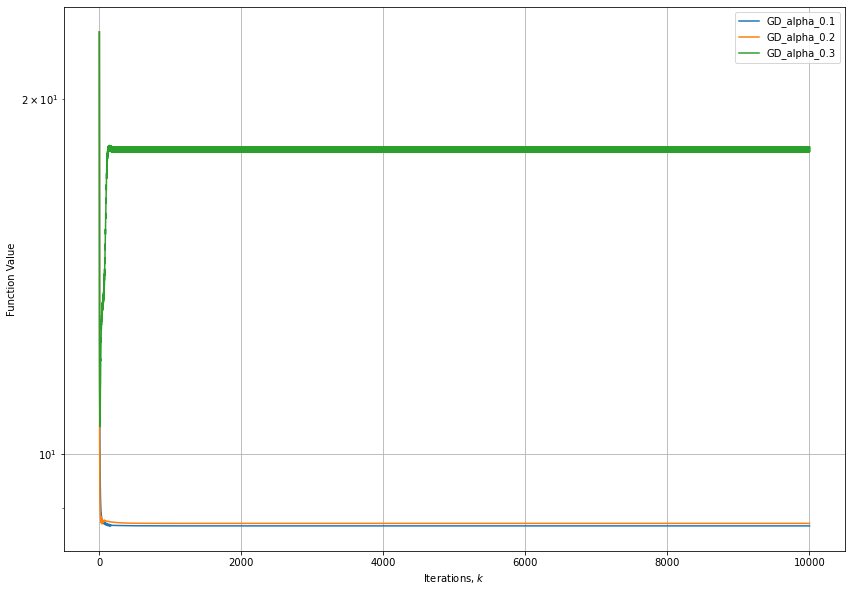

In [8]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [
    GradientDescent(ConstantStepSize(alpha=0.1), name='GD_alpha_0.1'),
    GradientDescent(ConstantStepSize(alpha=0.2), name='GD_alpha_0.2'),
    GradientDescent(ConstantStepSize(alpha=0.3), name='GD_alpha_0.3'),
    #GradientDescent(ConstantStepSize(alpha=0.4), name='GD_alpha_0.4'),
]
for method in methods:
    method.solve(x0, problem.F, problem.subgradF, max_iter=10000, tol=1e-9)
for method in methods:
    times, vals = parse_logs(method.history, ret_time=False, funcx=problem.F)
    plt.semilogy(times, vals, label=method.name)
plt.grid()
plt.xlabel(r"Iterations, $k$")
plt.ylabel("Function Value")
plt.legend()
plt.show()

### Для  $\alpha=0.1$ наблюдается наилучшая сходимость

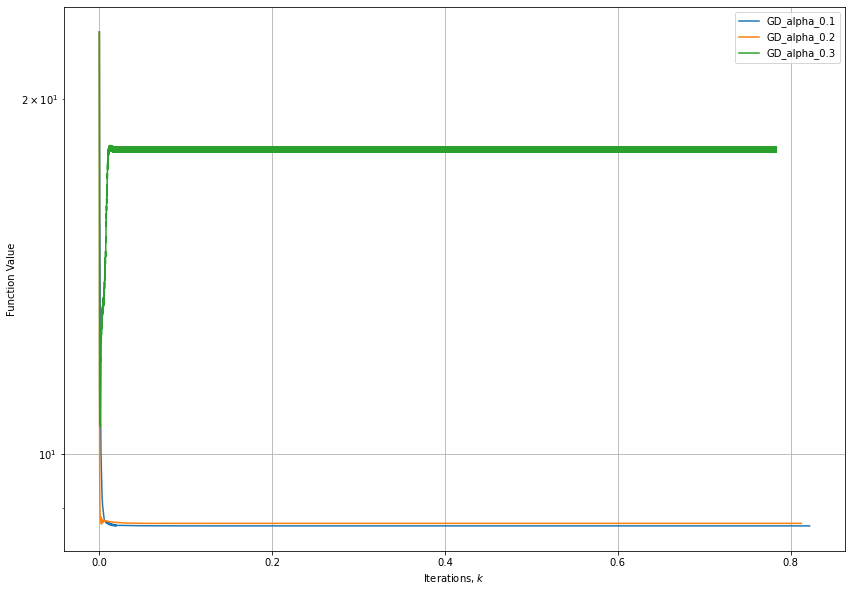

In [9]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [
    GradientDescent(ConstantStepSize(alpha=0.1), name='GD_alpha_0.1'),
    GradientDescent(ConstantStepSize(alpha=0.2), name='GD_alpha_0.2'),
    GradientDescent(ConstantStepSize(alpha=0.3), name='GD_alpha_0.3'),
    #GradientDescent(ConstantStepSize(alpha=0.4), name='GD_alpha_0.4'),

]
for method in methods:
    method.solve(x0, problem.F, problem.subgradF, max_iter=10000, tol=1e-9)
for method in methods:
    times, vals = parse_logs(method.history, ret_time=True, funcx=problem.F)
    plt.semilogy(times, vals, label=method.name)
plt.grid()
plt.xlabel(r"Iterations, $k$")
plt.ylabel("Function Value")
plt.legend()
plt.show()

###  Cубградиентный метод с убывающим шагом

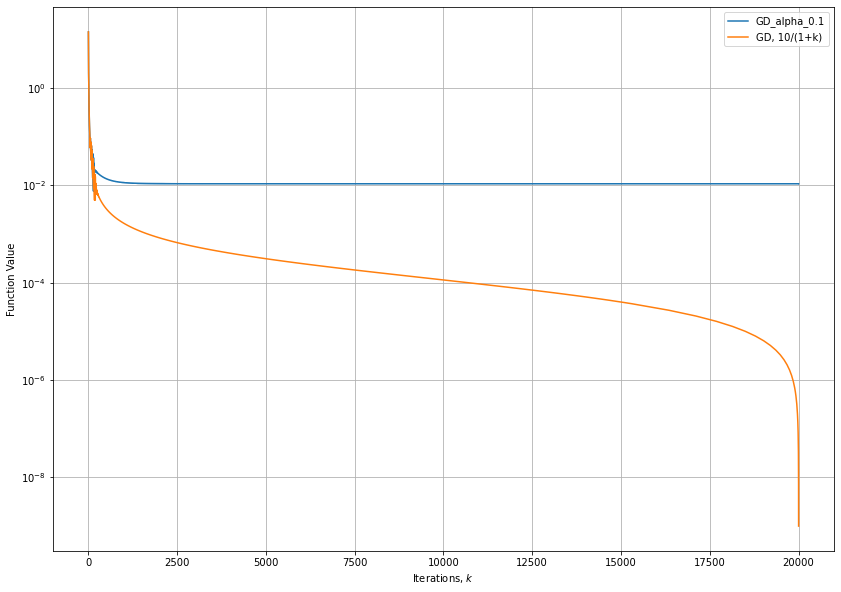

In [10]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [
    GradientDescent(ConstantStepSize(alpha=1e-1), name='GD_alpha_0.1'),
    #GradientDescent(ConstantStepSize(alpha=0.2), name='GD_alpha_0.2'),
    #GradientDescent(ConstantStepSize(alpha=0.3), name='GD_alpha_0.3'),
    #GradientDescent(ConstantStepSize(alpha=0.4), name='GD_alpha_0.4'),
    GradientDescent(SeqStepSize(alpha_function=lambda k: min(1e-1, 10./(1+k))), name='GD, 10/(1+k)'),
           ]

min_value = np.inf
for method in methods:
    current_value = problem.F(method.solve(x0, problem.F, problem.subgradF, max_iter=20000, tol=0))
    min_value = min_value if min_value < current_value else current_value
for method in methods:
    times, values = parse_logs(method.history, ret_time=False, funcx=problem.F)
    plt.semilogy(times, values-min_value+1e-9, label=method.name)
plt.grid()
plt.ylabel("Function Value")
plt.xlabel(r"Iterations, $k$")
plt.legend()
plt.show()

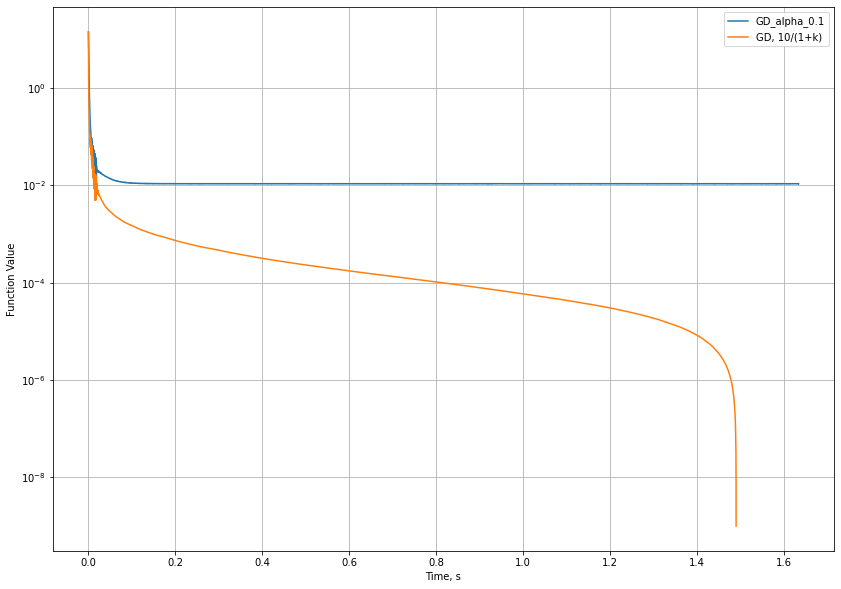

In [11]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [
    GradientDescent(ConstantStepSize(alpha=1e-1), name='GD_alpha_0.1'),
    #GradientDescent(ConstantStepSize(alpha=0.2), name='GD_alpha_0.2'),
    #GradientDescent(ConstantStepSize(alpha=0.3), name='GD_alpha_0.3'),
    #GradientDescent(ConstantStepSize(alpha=0.4), name='GD_alpha_0.4'),
    GradientDescent(SeqStepSize(alpha_function=lambda k: min(1e-1, 10./(1+k))), name='GD, 10/(1+k)'),
           ]

min_value = np.inf
for method in methods:
    current_value = problem.F(method.solve(x0, problem.F, problem.subgradF, max_iter=20000, tol=0))
    min_value = min_value if min_value < current_value else current_value
for method in methods:
    times, values = parse_logs(method.history, ret_time=True, funcx=problem.F)
    plt.semilogy(times, values-min_value+1e-9, label=method.name)
plt.grid()
plt.ylabel("Function Value")
plt.xlabel(r"Time, s")
plt.legend()
plt.show()

### $\min\left(\frac{10}{1+k}, 0.1\right)$ оказался лучшим

### Сравните Субградиентный метод с 4 пункта, Проксимальный метод с Backtracking Search и Ускоренный Проксимальный метод с Backtracking Search

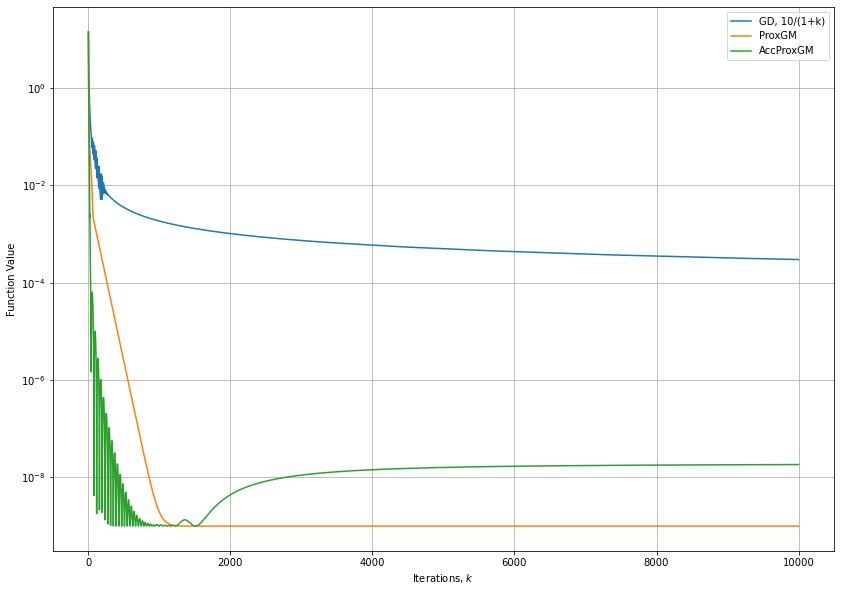

In [12]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [GradientDescent(SeqStepSize(alpha_function=lambda k: min(1e-1, 10./(1+k))), name='GD, 10/(1+k)'),
           ProxGM(name='ProxGM', beta=0.9),
           AccProxGM(name='AccProxGM', beta=0.7, lam0=100)
           ]

min_value = np.inf
current_value = problem.F(methods[0].solve(x0, problem.F, problem.subgradF, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
current_value = problem.F(methods[1].solve(x0, problem.f, problem.gradf, problem.R_prox, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
current_value = problem.F(methods[2].solve(x0, problem.f, problem.gradf, problem.R_prox, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
for method in methods:
    times, values = parse_logs(method.history, ret_time=False, funcx=problem.F)
    plt.semilogy(times, values-min_value+1e-9, label=method.name)
plt.grid()
plt.ylabel("Function Value")
plt.xlabel(r"Iterations, $k$")
plt.legend()
plt.show()

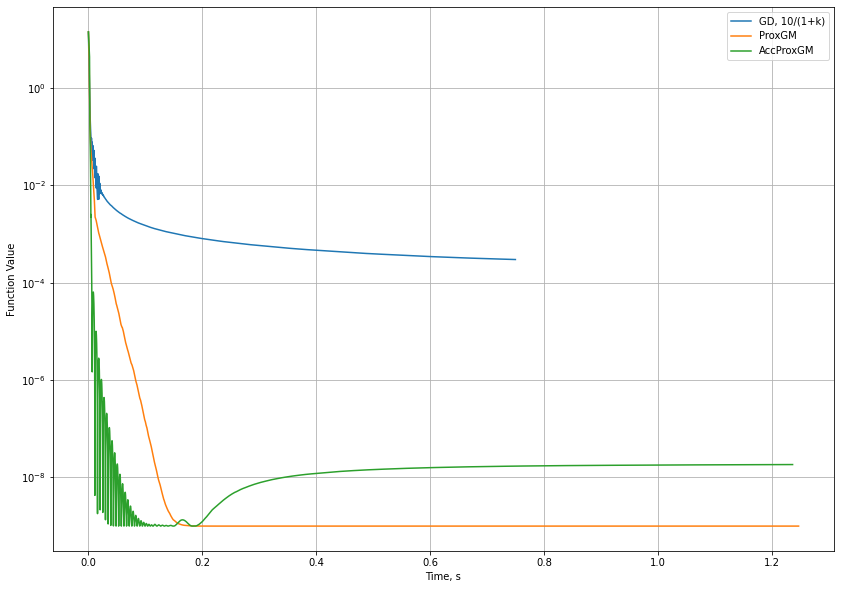

In [13]:
plt.rcParams["figure.figsize"] = (14,10)
methods = [GradientDescent(SeqStepSize(alpha_function=lambda k: min(1e-1, 10./(1+k))), name='GD, 10/(1+k)'),
           ProxGM(name='ProxGM', beta=0.9),
           AccProxGM(name='AccProxGM', beta=0.7, lam0=100)
           ]

min_value = np.inf
current_value = problem.F(methods[0].solve(x0, problem.F, problem.subgradF, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
current_value = problem.F(methods[1].solve(x0, problem.f, problem.gradf, problem.R_prox, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
current_value = problem.F(methods[2].solve(x0, problem.f, problem.gradf, problem.R_prox, max_iter=10000, tol=0))
min_value = min_value if min_value < current_value else current_value
for method in methods:
    times, values = parse_logs(method.history, ret_time=True, funcx=problem.F)
    plt.semilogy(times, values-min_value+1e-9, label=method.name)
plt.grid()
plt.ylabel("Function Value")
plt.xlabel(r"Time, s")
plt.legend()
plt.show()